In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df = ride_data.merge(city_data, how = 'left', on = 'city')

# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

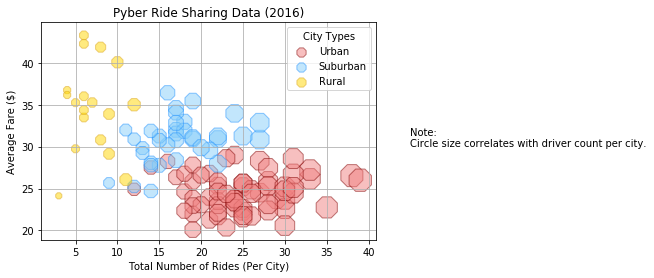

In [5]:
# Obtain the x and y coordinates for each of the three city types
average_fare = city_ride_df.groupby('city')['fare'].mean()
total_rides = city_ride_df.groupby('city')['ride_id'].count()
drivers_count = city_ride_df.groupby('city')['driver_count'].count()
city_by_type = city_data.set_index('city')['type']

city_rides_df = pd.DataFrame({
    'Number of Rides' : total_rides,
    'Average Fare' : average_fare,
    'Number of Drivers' : drivers_count,
    'Type of City' : city_by_type
})

urban = city_rides_df.loc[city_rides_df['Type of City'] == 'Urban']
suburban = city_rides_df.loc[city_rides_df['Type of City'] == 'Suburban']
rural = city_rides_df.loc[city_rides_df['Type of City'] == 'Rural']

# Build the scatter plots for each city types
plt.scatter(urban['Number of Rides'], urban['Average Fare'], marker = "8", color = 'lightcoral', edgecolors = 'maroon',  linewidth = 1, s = urban['Number of Drivers'] * 15, label = 'Urban', alpha = 0.5)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], marker = "8",color = 'lightskyblue', edgecolors = 'dodgerblue',  linewidth = 1, s = suburban['Number of Drivers'] * 15, label = 'Suburban', alpha = 0.5)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], marker = "8",color = 'gold', edgecolors = 'goldenrod',  linewidth = 1,s = rural['Number of Drivers'] * 15, label = 'Rural', alpha = 0.5)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(fontsize = 10, title = 'City Types', loc = 'best')
for i in range(len(legend.legendHandles)):
    legend.legendHandles[i]._sizes = [100]

# Incorporate a text label regarding circle size
plt.text(45, 30, "Note:\nCircle size correlates with driver count per city.")
plt.grid()

# Save Figure
plt.savefig("Pyber Ride Sharing Data (2016).png")

# Show plot
plt.show()

## Total Fares by City Type

In [8]:
# Generic setup for the following three pie charts
pie_labels = ['Rural', 'Suburban', 'Urban']
pie_colors = ['gold', 'lightskyblue', 'lightcoral']
pie_explode = (0, 0, .15)
autopct = "%1.1f%%"
startangle = 140

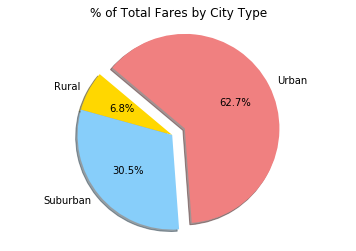

In [13]:
# Calculate Type Percents
pie_types = city_ride_df.groupby('type')['fare'].sum()

# Build Pie Chart
plt.pie(pie_types, explode = pie_explode, labels = pie_labels, colors = pie_colors, autopct = autopct, startangle = startangle, shadow = True)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Total Fare by City Type.png")

# Show Figure
plt.show()

## Total Rides by City Type

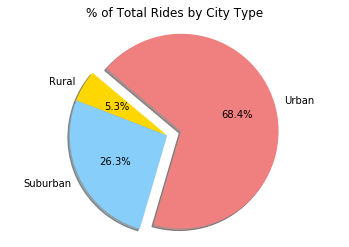

In [164]:
# Calculate Ride Percents
pie_types = city_ride_df.groupby('type')['ride_id'].count()

plt.pie(pie_types, explode = pie_explode, labels = pie_labels, colors = pie_colors, autopct = autopct, startangle = startangle, shadow = True)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Total Rides by City Type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

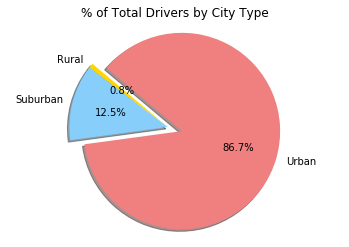

In [165]:
# Calculate Ride Percents
pie_types = city_ride_df.groupby('type')['driver_count'].sum()

# Build Pie Chart
plt.pie(pie_types, explode = pie_explode, labels = pie_labels, colors = pie_colors, autopct = autopct, startangle = startangle, shadow = True)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Total Drivers by City Type.png")

# Show Figure
plt.show()